# Pilot analyses

This is a single notebook to perform pilot analyses on mEC6 in the week leading up to the report deadline (oop).

We want to extract trajectories here and save them in a format similar to the simulated data output so that it can directly be used by simulation scripts.


In [1]:
# @title VScode setup

import os

#Main package dependencies
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import ratinabox as riab

#Importing files from Peter Doohan's maze codebase:

import functions.representations as mr
import functions.plotting as mp
#Note that functions and packages e.g. plt and nx will be retrievable under plotting

#Bridging networkX maze representations to RatInABox

import functions.mouse_in_a_maze as miam

### SET DIRECTORY ###

subject_dir = '/Users/cburns/Documents/Research/maze_grid_cells/data/processed_pilot/'


C:\Users\cburns\AppData\Local\Temp\ipykernel_11516\2183545536.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Playing around with processed data

What do I want to do?

-> Quickly load and plot a clean trajectory for a session.
-> Look at head direction and velocity distributions (we should expect four peaks in HD)
-> save the trajectory file in similar format as the simulations (we can then run Dordek at least once?)
-> Plot a single trial trajectory
-> Get a dataframe for transitions (collapse consecutive maze locations that are matching)


In [142]:
## FUNCTIONS ## 

def get_frames_df(type_string, date_string, subject = 'mEC_6'):
    session_dir = subject_dir+'/'+date_string+'/'+type_string+'/'
    track_df = pd.read_csv(session_dir+'frames.tracking.htsv',sep='\t')
    traj_df = pd.read_csv(session_dir+'frames.trajectories.htsv',sep='\t')
    df_list = [track_df,traj_df]
    if type_string == 'maze':
        trialinfo_df = pd.read_csv(session_dir+'frames.trialinfo.htsv',sep='\t')
        df_list.append(trialinfo_df)
    
    frames_df = pd.concat(df_list, axis=1) #concatenate along columns

#Multi-indexing
    column_list = []
    for each_column in frames_df.columns:#
        if '.' in each_column:
            column_list.append(tuple(each_column.split(".")))
        else:
            column_list.append(tuple([each_column,'value']))
        
    frames_df.columns = pd.MultiIndex.from_tuples(column_list)
    
    return frames_df
    

In [127]:
## Loading data

subject_dir = 'C:/Users/cburns/Documents/Research/maze_grid_cells/data/processed_pilot/mEC_6/'
date = '2024-02-20'
session_dir = subject_dir+date+'/maze/'

events_df = pd.read_csv(session_dir+'events.htsv',sep='\t')
trials_df = pd.read_csv(session_dir+'trials.htsv',sep='\t')

track_df = pd.read_csv(session_dir+'frames.tracking.htsv',sep='\t')
traj_df = pd.read_csv(session_dir+'frames.trajectories.htsv',sep='\t')

trialinfo_df = pd.read_csv(session_dir+'frames.trialinfo.htsv',sep='\t')

frames_df = pd.concat([track_df,traj_df,trialinfo_df], axis=1)

#Multi-indexing
column_list = []
for each_column in frames_df.columns:#
    if '.' in each_column:
        column_list.append(tuple(each_column.split(".")))
    else:
        column_list.append(tuple([each_column,'value']))
    
frames_df.columns = pd.MultiIndex.from_tuples(column_list)


head_front            head_mid           head_back               ear_L  \
                x         y         x         y         x         y         x   
0        0.335984  0.365088  0.330577  0.359126  0.325410  0.349898  0.315339   
1        0.340204  0.361218  0.333779  0.355125  0.329138  0.348988  0.318431   
2        0.343970  0.365793  0.334781  0.359713  0.329374  0.350532  0.319337   
3        0.344777  0.366352  0.335507  0.360330  0.330064  0.351208  0.320001   
4        0.344879  0.370834  0.335707  0.364729  0.330416  0.355513  0.320356   
...           ...       ...       ...       ...       ...       ...       ...   
117104        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
117105        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
117106        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
117107   0.888179  0.110003  0.888642  0.100090  0.889203  0.094593  0.884391   
117108   0.884499  0.106047  0.888884  0.100397  0.889495  0.095194  0.884989   

                     ear_R            ... head_direction               \
               y         x         y  ...          value interpolated   
0       0.349158  0.330277  0.340815  ...      32.013470            0   
1       0.347705  0.335399  0.343432  ...      28.137469            0   
2       0.350300  0.333782  0.341204  ...      37.961521            0   
3       0.351102  0.334380  0.341865  ...      38.443453            0   
4       0.355078  0.335057  0.346334  ...      37.046176            0   
...          ...       ...       ...  ...            ...          ...   
117104       NaN       NaN       NaN  ...     348.421268            1   
117105       NaN       NaN       NaN  ...     348.406882            1   
117106       NaN       NaN       NaN  ...     348.392497            1   
117107  0.088886  0.898728  0.093947  ...     348.378113            0   
117108  0.089655  0.898669  0.094676  ...     337.563695            0   

       centroid_position                        maze_position          trial  \
                       x         y interpolated        simple skeleton value   
0               0.325410  0.349898            0            B2     B2_C   NaN   
1               0.329138  0.348988            0            B2     B2_C   NaN   
2               0.329374  0.350532            0            B2     B2_C   NaN   
3               0.330064  0.351208            0            B2     B2_C   NaN   
4               0.330416  0.355513            0            B2     B2_C   NaN   
...                  ...       ...          ...           ...      ...   ...   
117104          0.888616  0.094616            1            E1    E1_SE   NaN   
117105          0.888812  0.094608            1            E1    E1_SE   NaN   
117106          0.889007  0.094601            1            E1    E1_SE   NaN   
117107          0.889203  0.094593            0            E1    E1_SE   NaN   
117108          0.889495  0.095194            0            E1    E1_SE   NaN   

       trial_phase  goal  
             value value  
0              NaN   NaN  
1              NaN   NaN  
2              NaN   NaN  
3              NaN   NaN  
4              NaN   NaN  
...            ...   ...  
117104         NaN   NaN  
117105         NaN   NaN  
117106         NaN   NaN  
117107         NaN   NaN  
117108         NaN   NaN  

[117109 rows x 27 columns]

(0.03659999999999999, 1.3434, 0.03659999999999999, 1.3434)

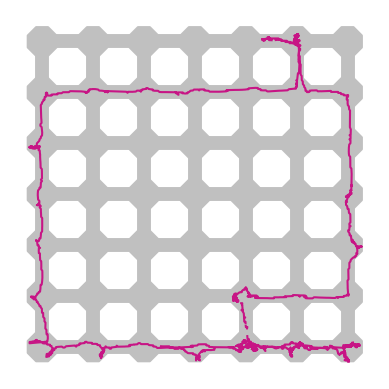

In [253]:
import seaborn as sns

frames_df = get_frames_df('maze', '2024-02-20')

trial_df = frames_df.loc[frames_df['trial'].value==7,'head_back']

fig, ax = plt.subplots()

mp.plot_simple_maze_silhouette(mr.get_simple_maze('FC'), ax = ax, color='silver')

plt.plot(trial_df['x'],trial_df['y'],color='mediumvioletred')
ax.axis('off')
ax.axis('square')


,x,y
5042,0.681589,1.257137
5043,0.681002,1.260926
5044,0.677237,1.261090
5045,0.676758,1.261226
5046,0.676375,1.261414
...,...,...
7930,0.696916,0.328462
7931,0.696968,0.328528
7932,0.697293,0.328681
7933,0.697290,0.329102


In [102]:
subject_dir = 'C:/Users/cburns/Documents/Research/maze_grid_cells/data/processed_pilot/mEC_6/'
date = '2024-02-20'
session_dir = subject_dir+date+'/maze/'

big_df = pd.DataFrame() #initialise DataFrame


column_list = []
for each_column in big_df.columns:#
    if '.' in each_column:
        column_list.append(tuple(each_column.split(".")))
    else:
        column_list.append(tuple([each_column,'value']))
    
big_df.columns = pd.MultiIndex.from_tuples(column_list)


,value
5042,1.0
5043,1.0
5044,1.0
5045,1.0
5046,1.0
...,...
77972,23.0
77973,23.0
77974,23.0
77975,23.0
